# MLPERF INFERENCE

# Thoughts from Lenovo paper

- Inference is more difficult than training because latency, throughput, and efficiency need to be balanced. Furthermore, a more complex infrastructure and evaluation criteria is needed.
- Balance also accuracy by pruning networks or lowering numerical precision (quantization).
- Multiple scenarios to consider: Classification, detection, NLP.
- Review of past benchmark initiatives: DeepBench, DAWNBench. MLPerf differs from others, due to number of tasks, more metrics, wider support by companies.
- MLPerf is only focused on DL tasks wheres other steps beyond training and inference are relegated such as data handling, preparation, monitoring, continous learning.
- The LoadGen module sends requests to the Model. 
- LoadGen supports 4 tupes of queries: Single-stream, Multistream, Server, Offline.
- In offline (batch) scenario GPU performs better than CPU.
- A comparison table is shown that depicts the throughput of different accelerators. This is the benchmark.
- Lenovo DCG is preparing to submit the Inferenve v0.7 benchmark.
- The benchmarking feature (not the competition) is useful for Lenovo to verify performance on its server portfolio.
- 

# Thoughts about MLPerf for Scanflow

- It is interesting the types of inference applied to a model: single-stream, multi-stream, server, offline.
- It is helpful to check the variaty of data structure used in the inference, such as, images, texts, tabular.
- Adapt the log values into the scanflow Tracking (queries, queries per second, etc.).

# Thoughts about Scanflow for MLPerf

In [34]:
os.environ["MODEL_DIR"]

'/home/guess/Desktop/scanflow/examples/mlperf/workflow/models'

In [1]:
import os, sys
import click


# @click.command(help="usage: python tf|onnxruntime|pytorch|tflite \
#                [resnet50|mobilenet|ssd-mobilenet|ssd-resnet34] [cpu|gpu]")
# @click.option("--backend", help="tf|onnxruntime|pytorch|tflite",
#               type=click.Choice(['tf', 'onnxruntime', 'pytorch', 
#                                 'tflite']), default="tf")
# @click.option("--model", help="resnet50|mobilenet|ssd-mobilenet|ssd-resnet34",
#               type=click.Choice(['resnet50', 'mobilenet', 'ssd-mobilenet', 
#                                 'ssd-resnet34']), default="resnet50")
# @click.option("--device", help="cpu|gpu",
#               type=click.Choice(['cpu', 'gpu']), default="cpu")
def get_params(backend, model, device):
    if device == 'cpu':
        os.environ["CUDA_VISIBLE_DEVICES"] = ""
    
    name = f"{model}-{backend}"
    extra_args=""
    MODEL_DIR = os.environ["MODEL_DIR"]
    # Tensorflow
    if name == "resnet50-tf":
        model_path = os.path.join(MODEL_DIR, "resnet50_v1.pb")
        profile = "resnet50-tf"
    elif name == "mobilenet-tf":
        model_path = os.path.join(MODEL_DIR, "mobilenet_v1_1.0_224_frozen.pb")
        profile = "mobilenet-tf"
    elif name == "ssd-mobilenet-tf":
        model_path = os.path.join(MODEL_DIR, "ssd_mobilenet_v1_coco_2018_01_28.pb")
        profile = "ssd-mobilenet-tf"        
    elif name == "ssd-resnet34-tf":
        model_path = os.path.join(MODEL_DIR, "resnet34_tf.22.1.pb")
        profile = "ssd-resnet34-tf"

    # onnxruntime
    if name == "resnet50-onnxruntime":
        model_path = os.path.join(MODEL_DIR, "resnet50_v1.onnx")
        profile = "resnet50-onnxruntime"
    elif name == "mobilenet-onnxruntime":
        model_path = os.path.join(MODEL_DIR, "mobilenet_v1_1.0_224.onnx")
        profile = "mobilenet-onnxruntime"
    elif name == "ssd-mobilenet-onnxruntime":
        model_path = os.path.join(MODEL_DIR, "ssd_mobilenet_v1_coco_2018_01_28.pb")
        profile = "ssd-mobilenet-onnxruntime"        
    elif name == "ssd-resnet34-onnxruntime":
        model_path = os.path.join(MODEL_DIR, "resnet34-ssd1200.onnx")
        profile = "ssd-resnet34-onnxruntime"
    elif name == "ssd-resnet34-tf-onnxruntime":
        model_path = os.path.join(MODEL_DIR, "ssd_resnet34_mAP_20.2.onnx")
        profile = "ssd-resnet34-onnxruntime-tf"
        
    # pytorch
    
    if name == "resnet50-pytorch":
        model_path = os.path.join(MODEL_DIR, "resnet50_v1.onnx")
        profile = "resnet50-pytorch"
    elif name == "mobilenet-pytorch":
        model_path = os.path.join(MODEL_DIR, "mobilenet_v1_1.0_224.onnx")
        profile = "mobilenet-pytorch"
    elif name == "ssd-mobilenet-pytorch":
        model_path = os.path.join(MODEL_DIR, "ssd_mobilenet_v1_coco_2018_01_28.pb")
        profile = "ssd-mobilenet-pytorch"        
    elif name == "ssd-resnet34-pytorch":
        model_path = os.path.join(MODEL_DIR, "resnet34_tf.22.1.pb")
        profile = "ssd-resnet34-pytorch"
        
    # tflite
    
    if name == "resnet50-tflite":
        model_path = os.path.join(MODEL_DIR, "resnet50_v1.tflite")
        profile = "resnet50-tf"
        extra_args=f"{extra_args} --backend tflite"
        
    elif name == "mobilenet-tflite":
        model_path = os.path.join(MODEL_DIR, "mobilenet_v1_1.0_224.tflite")
        profile = "mobilenet-tf"
        extra_args=f"{extra_args} --backend tflite"
#     else:
#         print("Incorrect backend")
#         sys.exit(1)
        
    name = f"{backend}-{device}/{model}"
    os.environ["EXTRA_OPS"] = f"{extra_args} {os.environ['EXTRA_OPS']}"
    
    return name, model_path, profile
    
# if __name__ == '__main__':
#     if 'DATA_DIR' in os.environ:
#         DATA_DIR = os.environ['DATA_DIR']
#     else:
#         print("DATA_DIR not set")
#         sys.exit(1)
        
#     if 'MODEL_DIR' in os.environ:
#         MODEL_DIR = os.environ['MODEL_DIR']
#     else:
#         print("MODEL_DIR not set")
#         sys.exit(1)
        

#     get_params()

In [2]:
root = '/home/guess/Desktop/scanflow/examples/mlperf/workflow'
os.environ['MODEL_DIR'] = os.path.join(root, 'models')
os.environ['DATA_DIR'] = os.path.join(root, "fake_imagenet")
os.environ['EXTRA_OPS'] ="--samples-per-query 20 --time 10 --max-latency 0.2 --accuracy"

backend = "tf"
model = "resnet50"
device = "cpu"

name, model_path, profile = get_params(backend, model, device)

OUTPUT_DIR = os.path.join(root, 'output', name)
OUTPUT_DIR

'/home/guess/Desktop/scanflow/examples/mlperf/workflow/output/tf-cpu/resnet50'

In [3]:
ctn_root = '/mlperf'
ctn_data = os.path.basename(os.environ['DATA_DIR'])
ctn_data = os.path.join(ctn_root, ctn_data)
ctn_output = os.path.join(ctn_root, 'output')
ctn_model = os.path.basename(os.environ['MODEL_DIR'])
ctn_model = os.path.join(ctn_root, ctn_model, 'resnet50_v1.pb')

# volumes = {os.environ['DATA_DIR']: {'bind': ctn_data, 'mode':'rw'},
#           os.environ['MODEL_DIR']: {'bind': ctn_model, 'mode':'rw'},
#           '/proc': {'bind': '/host_proc', 'mode':'rw'},
#           OUTPUT_DIR: {'bind': ctn_output, 'mode':'rw'},
#           app_dir: {'bind': ctn_root, 'mode':'rw'}}

volumes = {'/proc': {'bind': '/host_proc', 'mode':'rw'},
          root: {'bind': ctn_root, 'mode':'rw'}}    
    
environment = {'opts': f"--mlperf_conf ./mlperf.conf --profile {profile} --model {ctn_model} \
   --dataset-path {ctn_data} --output {ctn_output} {os.environ['EXTRA_OPS']}"}

In [4]:
base_params = {'mlperf_conf': './mlperf.conf', 'profile': profile,
               'model': ctn_model, 'dataset-path': ctn_data,
               'output': ctn_output, 'time': 10, 'max-latency': 0.2,
               'accuracy': ''}
base_params

{'mlperf_conf': './mlperf.conf',
 'profile': 'resnet50-tf',
 'model': '/mlperf/models/resnet50_v1.pb',
 'dataset-path': '/mlperf/fake_imagenet',
 'output': '/mlperf/output',
 'time': 10,
 'max-latency': 0.2,
 'accuracy': ''}

In [32]:
%%time

import sys
sys.path.insert(0,'..')

from scanflow.setup import Setup, Executor, Tracker, Workflow
from scanflow.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/scanflow/examples/mlperf/'

executors = [Executor(name='mlperf-1', 
                       file='python/mlperf_main.py',
#                        file='python/main.py',
                       parameters=dict({'samples-per-query': 20},
                                       **base_params),
#                        dockerfile='Dockerfile2.cpu',
                       env='mlperf-infer-imgclassify-cpu:mlflow'),
              
             Executor(name='mlperf-2', 
                       file='python/mlperf_main.py',
#                        file='python/main.py',
                       parameters=dict({'samples-per-query': 1000},
                                       **base_params),
#                        dockerfile='Dockerfile2.cpu',
                       env='mlperf-infer-imgclassify-cpu:mlflow')
            
]

workflow1 = Workflow(name='workflow1', 
                     executors=executors,
                     tracker=Tracker(port=8001))


workflower = Setup(app_dir, workflows=[workflow1],
                             verbose=False)

# Build the nodes
workflower.build_workflows()
workflower
# Start containers and run workflows
# deployer = Deploy(app_dir, workflower, verbose=False)


CPU times: user 16 ms, sys: 4.62 ms, total: 20.6 ms
Wall time: 22.3 ms



Setup = (
    Workflows: ['workflow1']
)

In [28]:
# Start containers

deployer = Deploy(app_dir, workflower, verbose=True)

deployer.start_workflows(volumes=volumes, environment=environment)



  0%|          | 0/1 [00:00<?, ?it/s]12-Oct-20 11:17:31 -  INFO - [++] Starting workflow: [workflow1].
12-Oct-20 11:17:31 -  WARNING - [+] Network: [network_workflow1] is already running.
12-Oct-20 11:17:31 -  INFO - [+] Starting env: [workflow1:mlperf-1].
12-Oct-20 11:17:31 -  INFO - [+] Environment: [mlperf-1] has not been started in local. Starting a new one.
12-Oct-20 11:17:31 -  INFO - [+] Starting env: [workflow1:mlperf-2].
12-Oct-20 11:17:31 -  INFO - [+] Environment: [mlperf-2] has not been started in local. Starting a new one.
12-Oct-20 11:17:32 -  INFO - [+] Starting image: [tracker-workflow1.
12-Oct-20 11:17:32 -  INFO - [+] Environment: [tracker-workflow1] has not been started in local. Starting a new one.
12-Oct-20 11:17:32 -  INFO - [+] Workflow: [workflow1] was started successfully.
100%|██████████| 1/1 [00:01<00:00,  1.44s/it]


In [26]:
# deployer.stop_workflows()

In [33]:
deployer.run_workflows()

100%|██████████| 1/1 [00:08<00:00,  8.85s/it]

Elapsed time: 8.851582765579224


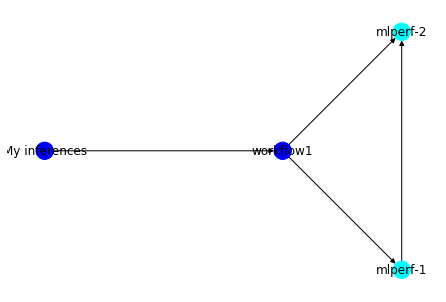

In [31]:
workflower.draw_workflow('My inferences')

In [29]:
import mlflow
import numpy as np

inferences = ["inference1", "inference2", "inference3"]

for inf in inferences:
    for i in range(5):
        with mlflow.start_run(run_name=inf) as mlrun:

            queries = int(np.random.rand()*10)
            eta = np.random.rand()
            acc = np.random.rand()
            mlflow.log_param(key='backend', value=backend)
            mlflow.log_param(key='model', value=model)
            mlflow.log_param(key='device', value=device)

            mlflow.log_metric(key='queries', value=queries)
            mlflow.log_metric(key='time', value=eta)
            mlflow.log_metric(key='queries_per_second', value=round(queries/eta, 2))
            mlflow.log_metric(key='accuracy', value=acc)
    
    

In [10]:
df = mlflow.search_runs(['0'])
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.time,metrics.queries_per_second,metrics.queries,metrics.accuracy,metrics.qps,params.backend,params.device,params.model,params.arguments,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.user
0,3de3c4bab35c4e13990a1d8047e9030f,0,FINISHED,file:///home/guess/Desktop/scanflow/tutorials/...,2020-09-29 10:00:39.943000+00:00,2020-09-29 10:00:39.985000+00:00,0.6,13.330000,8.0,0.75,NaN,pytorch,cpu,resnet50,None,LOCAL,inference,/home/guess/anaconda3/envs/venv2/lib/python3.7...,guess
1,d22d45cfa59f450f8daf5c10d0790784,0,FINISHED,file:///home/guess/Desktop/scanflow/tutorials/...,2020-09-29 10:00:21.927000+00:00,2020-09-29 10:00:21.977000+00:00,0.6,13.333333,8.0,0.75,NaN,pytorch,cpu,resnet50,None,LOCAL,inference,/home/guess/anaconda3/envs/venv2/lib/python3.7...,guess
2,d73988640f634476af3aab18296a3309,0,FINISHED,file:///home/guess/Desktop/scanflow/tutorials/...,2020-09-29 09:51:26.839000+00:00,2020-09-29 09:51:26.878000+00:00,NaN,NaN,NaN,NaN,13.23,pytorch,cpu,resnet50,None,LOCAL,inference,/home/guess/anaconda3/envs/venv2/lib/python3.7...,guess
3,0261193623f5402aadd6253da7c12343,0,FAILED,file:///home/guess/Desktop/scanflow/tutorials/...,2020-09-29 09:51:18.429000+00:00,2020-09-29 09:51:18.443000+00:00,NaN,NaN,NaN,NaN,NaN,None,None,None,None,LOCAL,inference,/home/guess/anaconda3/envs/venv2/lib/python3.7...,guess
4,0feec34cebfa4838bc469c391b2230c6,0,FINISHED,file:///home/guess/Desktop/scanflow/tutorials/...,2020-09-29 09:43:32.181000+00:00,2020-09-29 09:43:32.205000+00:00,NaN,NaN,NaN,NaN,13.23,pytorch,cpu,resnet50,None,LOCAL,inference,/home/guess/anaconda3/envs/venv2/lib/python3.7...,guess
5,fe62f1c148c84201ab517cf55ad0a87a,0,FINISHED,file:///home/guess/Desktop/scanflow/tutorials/...,2020-09-29 09:40:31.868000+00:00,2020-09-29 09:40:31.921000+00:00,NaN,NaN,NaN,NaN,NaN,None,None,None,"{'backend': 'pytorch', 'model': 'resnet50', 'd...",LOCAL,inference,/home/guess/anaconda3/envs/venv2/lib/python3.7...,guess
6,d2312a3e8f594b4ab55dc68ca303a9db,0,FAILED,file:///home/guess/Desktop/scanflow/tutorials/...,2020-09-29 09:39:03.263000+00:00,2020-09-29 09:39:03.276000+00:00,NaN,NaN,NaN,NaN,NaN,None,None,None,None,LOCAL,inference,/home/guess/anaconda3/envs/venv2/lib/python3.7...,guess


## Symbolic manipulation: guarantee the generalization

> **What happen if an inference node reach a certain limit value?. For instance, qps = 2, acc=0.6** .
>> First, maybe the workload on that node is heavy. Therefore, there should be a mechanism to control it. For instance, perform a load balancing, spreading the traffic across diferent nodes.
>> Second, perhaps the "B" model in the A/B testing is behaving badly. Therefore, automatically an action should be perfom to change the inference node to previous stable version.


 ```python
 if inference_time is critical:
     pick model A, 
 elif (accuracy is critical) 
     pick model B 
 else pick model  C
 ```
> **Can we explain tracked results (metrics)?** .
>> Yes, because we don't only track inference values but also the whole workflow (extracting, preprocessing, feature engineering, ...). Having a graph structure allows user to traverse the workflow and get a clue about "causality".

> **Can we add a human agent to perform certain actions?** .
>> Yes, some events could raise an alarm (critical cases), so that a human can intervene. For instance, in a batch scenario (Offline inference) a logic bug fix is needed.

> **Can we use this KB (knowledge base, tracked values somehow) to perform reasoning?** .
>> Not at this point because it requires a cognitive framework. 

> **Can we use this KB (knowledge base, tracked values somehow) to perform planning?** .
>> Not yet. However, the Scanflow's structure proposal is an initiative to at least manipulate variables to do a state-transition system.

## Learning: get insights through patterns

> **Can we predict request trends?**
>> We can use a Time series node to forecast behaviours. This is useful to prevent lack of resources, for instance.

> **Can we predict anomalies on input data and metrics such as accuracy, time, qps?**
>> Yes, using a drift distribution node. It detects anomalies on bothc requests and events regarding the platform.


